In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# 1 - Découverte et préparation des données

## 1.1 - Installation des packages

In [8]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

/content


## 1.2 - Découverte des données

Le nombre d'instances dans la base de données est de :  73643
Le nombre de features est de :  22
Le nombre d'accident indemne est de :  31004
Le nombre d'accident blessé léger est de :  25672
Le nombre d'accident blessé hospitalisé est de :  14891
Le nombre d'accident mortel est de :  2076


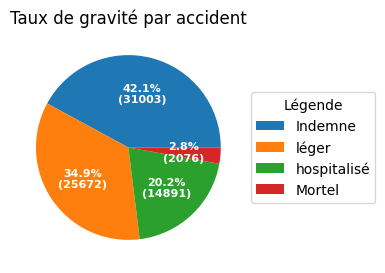

<class 'pandas.core.series.Series'>
0        1231922700
1        1231241400
2        1231261200
3        1233432000
4        1234979100
            ...    
73638    1260557100
73639    1261476000
73640    1261861200
73641    1261484400
73642    1256827200
Name: date, Length: 73643, dtype: int64
<class 'pandas.core.series.Series'>
0        1231922700
1        1231241400
2        1231261200
3        1233432000
4        1234979100
            ...    
73638    1260557100
73639    1261476000
73640    1261861200
73641    1261484400
73642    1256827200
Name: date, Length: 73643, dtype: int64


In [4]:
data = pd.read_csv("/content/drive/MyDrive/ProjetIA/stat_finale.csv")
print("Le nombre d'instances dans la base de données est de : ", len(data))
print("Le nombre de features est de : ", data.shape[1])

print("Le nombre d'accident indemne est de : ", int(data['descr_grav'][data['descr_grav'] == 3].sum()/3))
print("Le nombre d'accident blessé léger est de : ", int(data['descr_grav'][data['descr_grav'] == 2].sum()/2))
print("Le nombre d'accident blessé hospitalisé est de : ", data['descr_grav'][data['descr_grav'] == 1].sum())
print("Le nombre d'accident mortel est de : ", int(data['descr_grav'][data['descr_grav'] == 4].sum()/4))

enc = OrdinalEncoder()

data_temp = data[["num_veh"]]
data.num_veh = enc.fit_transform(data_temp)

data_temp = data[["ville"]]
data.ville = enc.fit_transform(data_temp)

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

grav_acc = ["31004 / Indemne",
            "25672 / Blessé léger",
            "14891 / Blessé hospitalisé",
            "2076 / Mortel"]

data_pie = [float(x.split()[0]) for x in grav_acc]
legend = [x.split()[-1] for x in grav_acc]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data_pie, autopct=lambda pct: func(pct, data_pie),
                                  textprops=dict(color="w"))

ax.legend(wedges, legend,
          title="Légende",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Taux de gravité par accident")

plt.show()

print(type(data['date']))
timestamps = pd.to_datetime(data['date']).astype(int) // 10**9
data['date'] = timestamps
print(timestamps)


print(type(data['date']))
print(data['date'])

# Apprentissage supervisé - Répartition des données

        Num_Acc  num_veh  id_usa        date   ville  id_code_insee  latitude  \
0  200900000016      5.0  743965  1231922700  4370.0          44118 -1.233330   
1  200900000559      5.0  745034  1231241400  6101.0          73236  5.633330   
2  200900000560      5.0  745035  1231261200  6101.0          73236  5.633330   
3  200900001109      5.0  746121  1233432000  6321.0          66180  2.983330   
4  200900001120      0.0  746149  1234979100  5772.0          16373  0.066667   

   longitude  descr_cat_veh  descr_agglo  ...  descr_etat_surf  \
0    47.4833             10            2  ...                9   
1    45.6000             24            2  ...                4   
2    45.6000             22            2  ...                4   
3    42.7667             22            2  ...                7   
4    45.9667             22            2  ...                8   

   description_intersection  an_nais  age  place  descr_dispo_secu  \
0                         3     1969   54     

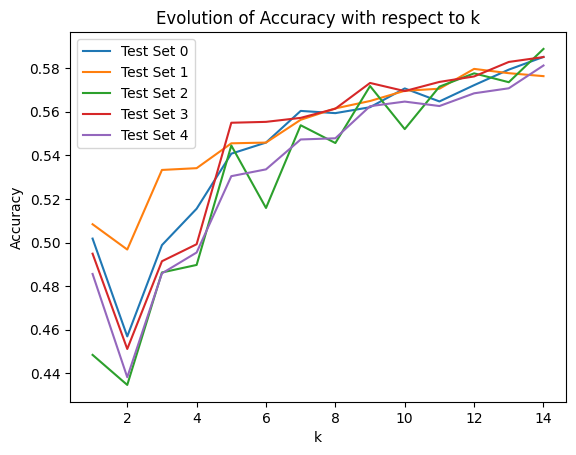

In [ ]:


print(data.head())

X = data[['descr_cat_veh', 'descr_agglo', 'descr_etat_surf', 'description_intersection', 'descr_dispo_secu', 'descr_type_col']]
y = data['descr_grav']  # Adaptation de l'étiquette (gravité des accidents)

# 3. Définir le nombre de répétitions souhaité
nombre_repetitions = 5

# Liste pour stocker les ensembles d'apprentissage et de tests
ensembles_apprentissage = []
ensembles_tests = []

# Effectuer une boucle pour chaque répétition algo holdout x5
for i in range(nombre_repetitions):
    # Diviser les données en ensembles d'apprentissage et de tests
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Stocker les ensembles d'apprentissage et de tests dans la liste
    ensembles_apprentissage.append((X_train, y_train))
    ensembles_tests.append((X_test, y_test))

nombre_repetitions_classification = 15

# Liste pour stocker les performances du modèle
performances = []



# Vérifier les ensembles d'apprentissage et de tests
for i in range(nombre_repetitions):
    print("Répétition", i)
    print("Ensemble d'apprentissage :", ensembles_apprentissage[i][0].shape)
    print("Ensemble de tests :", ensembles_tests[i][0].shape)

    k_values = []
    accuracy_values = []

    # Utiliser le kNN sur chaque ensemble de tests
    for j in range(1, nombre_repetitions_classification):
        # a. Récupérer les ensembles d'apprentissage et de tests
        X_train, y_train = ensembles_apprentissage[i]
        X_test, y_test = ensembles_tests[i]

        # Créer un objet KNeighborsClassifier et spécifier le nombre de voisins (k)
        #k = 5  # Nombre de voisins à considérer
        knn = KNeighborsClassifier(n_neighbors=j)

        # Entraîner le modèle sur les données d'apprentissage
        knn.fit(X_train, y_train)

        # d. Faire des prédictions sur les données de test
        y_pred = knn.predict(X_test)

        # Évaluer les performances du modèle en utilisant une métrique appropriée (par exemple, précision)
        performance = accuracy_score(y_test, y_pred)
        print("Précision du modèle : {:.2f}%".format(performance * 100))
        performances.append(performance)

        # Rechercher les accidents les plus similaires dans les données d'apprentissage
        k_plus_similaires = knn.kneighbors(X_test)
        # Vous pouvez utiliser k_plus_similaires pour obtenir les indices ou les données des exemples les plus similaires

        # Prédire la gravité des accidents dans les données de test
        gravite_predite = knn.predict_proba(X_test)
        # gravite_predite contient les probabilités prédictives pour chaque classe de gravité pour chaque exemple
        k_values.append(j)
        accuracy_values.append(performance)

    plt.plot(k_values, accuracy_values, label="Test Set {}".format(i))

# Mise a jour du titre et des labels du plot
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Evolution of Accuracy with respect to k")
plt.legend()

# 6. Calculer la moyenne et l'écart type des performances
moyenne_performance = sum(performances) / len(performances)
ecart_type_performance = pd.Series(performances).std()

print("Moyenne des performances :", moyenne_performance)
print("Écart type des performances :", ecart_type_performance)
print("Performances : ", performances)





## Méthode LeaveOneOut

In [11]:
from sklearn.model_selection import LeaveOneOut

nouvelle_base_donnees = pd.DataFrame()
classes_gravite = data['descr_grav'].unique()

for classe in classes_gravite:
    # Sélectionner les échantillons pour la classe de gravité actuelle
    ech_gravite = data[data['descr_grav'] == classe]

    # Calculer le nombre d'échantillons à conserver (10%)
    nb_echantillons = int(len(ech_gravite) * 0.1)

    # Extraire aléatoirement les 10% d'échantillons
    echantillons_reduits = ech_gravite.sample(n=nb_echantillons, random_state=42)

    # Ajouter les échantillons réduits à la nouvelle base de données
    nouvelle_base_donnees = pd.concat([nouvelle_base_donnees, echantillons_reduits])

X = nouvelle_base_donnees[['descr_cat_veh', 'descr_agglo', 'descr_etat_surf', 'description_intersection', 'descr_dispo_secu', 'descr_type_col']]
y = nouvelle_base_donnees['descr_grav']

print(X.shape)

# Nombre de répétitions souhaité
nombre_repetitions = X.shape[0]  # Nombre total d'échantillons

# Créer une liste pour stocker les performances moyennes
mean_performances = []

# Utiliser la méthode Leave-One-Out pour créer les ensembles de tests/entraînement
loo = LeaveOneOut()

# Effectuer une boucle pour chaque répétition
for train_index, test_index in loo.split(X):
    # Diviser les données en ensembles d'apprentissage et de tests
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Liste pour stocker les performances du modèle
    performances = []

    # Créer un objet KNeighborsClassifier et spécifier le nombre de voisins (k)
    for k in range(1, 15):
        knn = KNeighborsClassifier(n_neighbors=k)

        # Entraîner le modèle sur les données d'apprentissage
        knn.fit(X_train, y_train)

        # Faire des prédictions sur les données de test
        y_pred = knn.predict(X_test)

        # Évaluer les performances du modèle en utilisant une métrique appropriée (par exemple, précision)
        performance = accuracy_score(y_test, y_pred)
        print("Précision du modèle : {:.2f}%".format(performance * 100))
        performances.append(performance)

    # Calculer la moyenne des performances pour chaque valeur de k
    mean_performance = sum(performances) / len(performances)
    mean_performances.append(mean_performance)

# Calculer la moyenne et l'écart type des performances
moyenne_performance = sum(mean_performances) / len(mean_performances)
ecart_type_performance = pd.Series(mean_performances).std()

print("Moyenne des performances :", moyenne_performance)
print("Écart type des performances :", ecart_type_performance)
print("Performances :", mean_performances)






Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 100.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%
Précision du modèle : 0.00%


KNN from scratch

In [ ]:
from scipy import stats
class kNN():
    '''k-Nearest Neighbours'''
    # Initialise
    def __init__(self, k=3, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p

    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))

    # Manhattan distance (l1 norm)
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1-v2))

    # Minkowski distance (lp norm)
    def minkowski(self, v1, v2, p=2):
        if p is None:
            p = 2
        return np.sum(np.abs(v1-v2)**p)**(1/p)


    # Store train set
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Make predictions
    def predict(self, X_test):
        preds = []
        # Loop over rows in test set
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            majority = stats.mode(nearest_neighbours)[0][0]
            preds.append(majority)
        return np.array(preds)

    # Get nearest neighbours
    def get_neighbours(self, test_row):
        distances = list()

        # Calculate distance to all points in X_train
        for (train_row, train_class) in zip(self.X_train, self.y_train):
            if self.metric=='euclidean':
                dist = self.euclidean(train_row, test_row)
            elif self.metric=='manhattan':
                dist = self.manhattan(train_row, test_row)
            elif self.metric=='minkowski':
                dist = self.minkowski(train_row, test_row, self.p)
            else:
                raise NameError('Supported metrics are euclidean, manhattan and minkowski')
            distances.append((dist, train_class))

        # Sort distances
        distances.sort(key=lambda x: x[0])

        # Identify k nearest neighbours
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])

        return neighbours


# Function to calculate accuracy
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()

nouvelle_base_donnees = pd.DataFrame()
classes_gravite = data['descr_grav'].unique()

for classe in classes_gravite:
    # Sélectionner les échantillons pour la classe de gravité actuelle
    ech_gravite = data[data['descr_grav'] == classe]

    # Calculer le nombre d'échantillons à conserver (20%)
    nb_echantillons = int(len(ech_gravite) * 0.2)

    # Extraire aléatoirement les 10% d'échantillons
    echantillons_reduits = ech_gravite.sample(n=nb_echantillons, random_state=42)

    # Ajouter les échantillons réduits à la nouvelle base de données
    nouvelle_base_donnees = pd.concat([nouvelle_base_donnees, echantillons_reduits])


X = nouvelle_base_donnees[['descr_cat_veh', 'descr_agglo', 'descr_etat_surf', 'description_intersection', 'descr_dispo_secu', 'descr_type_col']]
y = nouvelle_base_donnees['descr_grav']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
# Apply our kNN algorithm
for metric in ['euclidean', 'manhattan', 'minkowski']:
    clf = kNN(k=15, metric=metric)
    clf.fit(X_train.values, y_train.values)
    preds = clf.predict(X_test.values)
    print(f'Metric: {metric}, accuracy: {accuracy(preds, y_test):.3f} %')

<ipython-input-20-0de9fff96267>:36: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = stats.mode(nearest_neighbours)[0][0]


Metric: euclidean, accuracy: 53.768 %
Metric: manhattan, accuracy: 53.734 %
Metric: minkowski, accuracy: 53.768 %
